# Multiclasss Data

### TreeExplainer

Evaluating ExtraTreesClassifier
Mean CV AUC Score: 0.9929


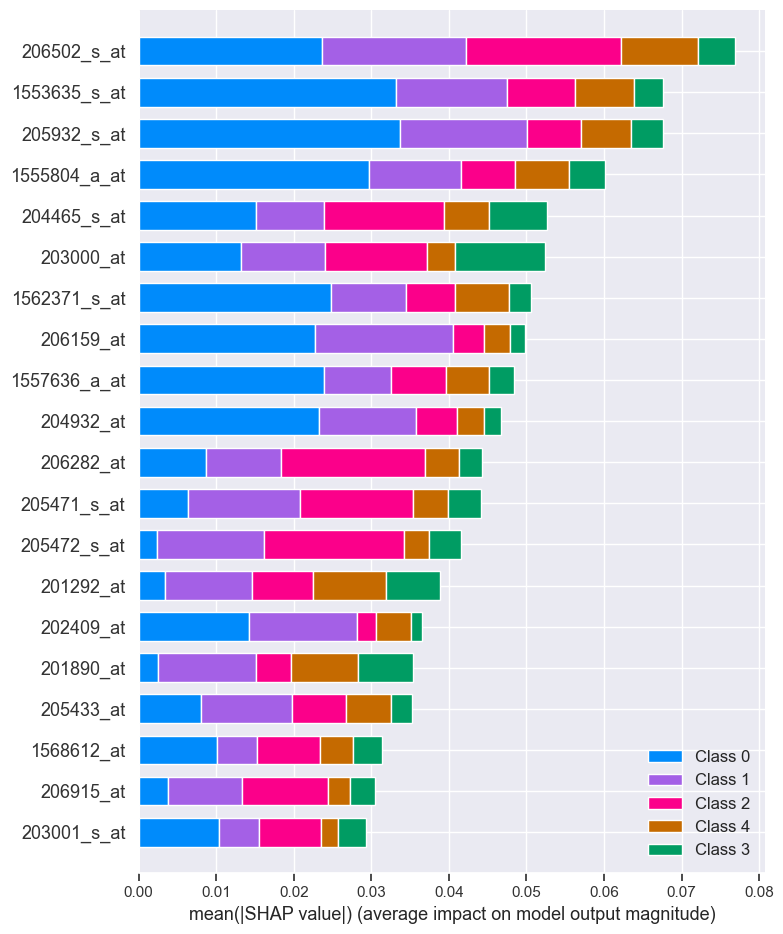

Test AUC Score: 0.9959


In [93]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np
import shap
# Load the dataset
data = pd.read_csv('../../brain_cancer.csv')

# Separate features (X) and target variable (y)
X = data.drop('type', axis=1)
y = data['type']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a list of tree-based classifiers
classifier_list = [

    ExtraTreesClassifier(n_estimators=100, random_state=42),

]

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Loop over each tree-based classifier
for clf in classifier_list:
    print(f"Evaluating {clf.__class__.__name__}")

    # Initialize lists for storing AUC scores
    cv_auc_scores = []
    test_auc_scores = []
    
    for train_index, valid_index in skf.split(X_train, y_train):
        X_train_cv = X_train.iloc[train_index]
        X_valid_cv = X_train.iloc[valid_index]
        y_train_cv = y_train.iloc[train_index]
        y_valid_cv = y_train.iloc[valid_index]

        # Train the classifier
        clf.fit(X_train_cv, y_train_cv)

        # Predict probabilities for the validation set
        y_prob = clf.predict_proba(X_valid_cv)

        # Calculate AUC for the validation set
        auc_score = roc_auc_score(y_valid_cv, y_prob, multi_class='ovr')
        cv_auc_scores.append(auc_score)

    # Calculate the mean AUC score for cross-validation
    mean_cv_auc = np.mean(cv_auc_scores)
    print(f"Mean CV AUC Score: {mean_cv_auc:.4f}")

    # Train the classifier on the entire training set for SHAP explanation
    clf.fit(X_train, y_train)

    # Explain the model's predictions using SHAP
    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(X_train)

    # Plot the SHAP values
    shap.summary_plot(shap_values, X_train, plot_type="bar")

    # Predict probabilities for the test set and calculate AUC
    y_prob_test = clf.predict_proba(X_test)
    test_auc_score = roc_auc_score(y_test, y_prob_test, multi_class='ovr')
    print(f"Test AUC Score: {test_auc_score:.4f}")



In [80]:
# Load the dataset
data = pd.read_csv('./../../brain_cancer.csv')

# Separate features (X) and target variable (y)
X = data.drop('type', axis=1)
y = data['type']

In [82]:
y

0      1
1      1
2      1
3      0
4      0
      ..
125    0
126    4
127    0
128    4
129    0
Name: type, Length: 130, dtype: int64

### Iris data

Evaluating RandomForestClassifier
Mean CV AUC Score: 0.9871
Test AUC Score: 1.0000


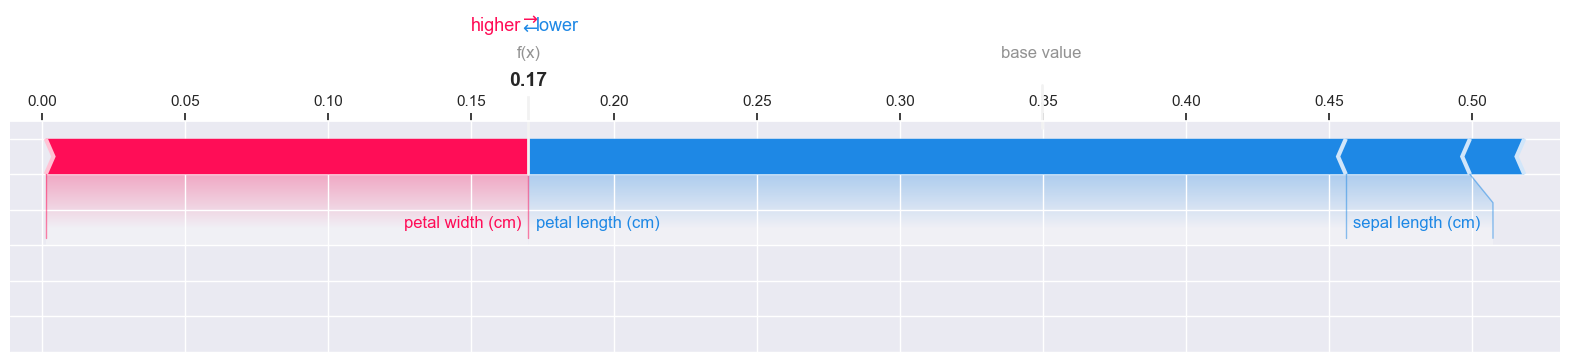

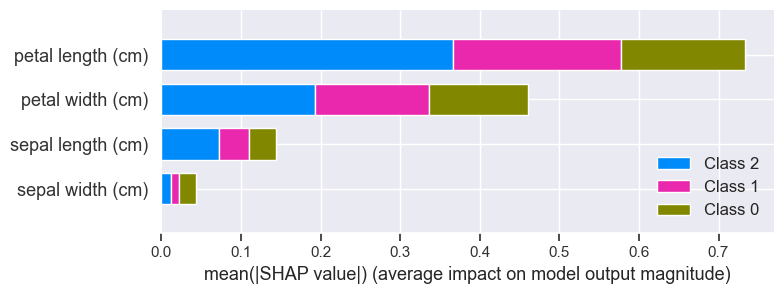

Evaluating ExtraTreesClassifier
Mean CV AUC Score: 0.9867
Test AUC Score: 1.0000


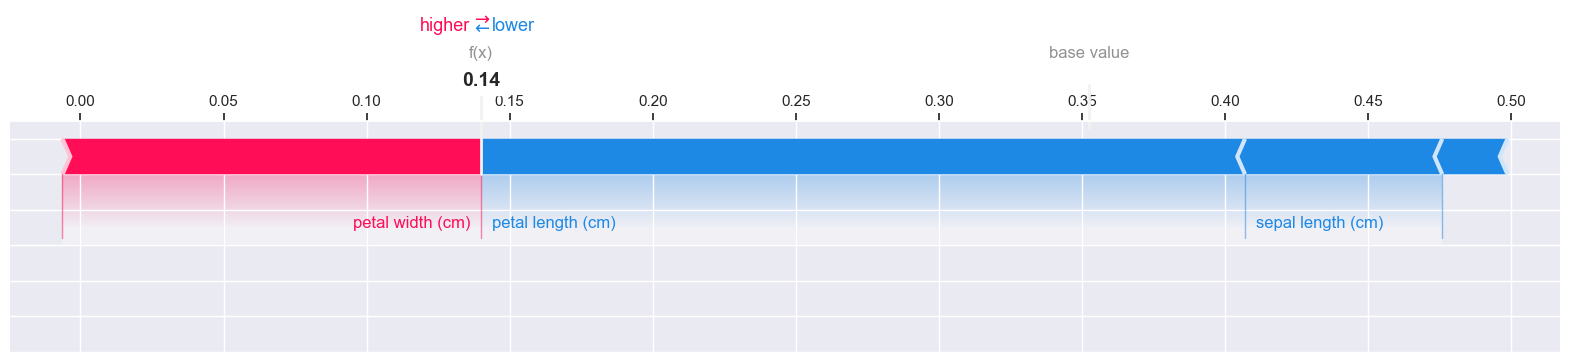

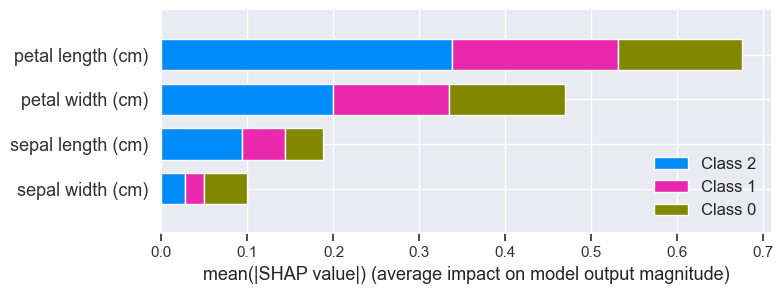

Evaluating DecisionTreeClassifier
Mean CV AUC Score: 0.9300
Test AUC Score: 1.0000


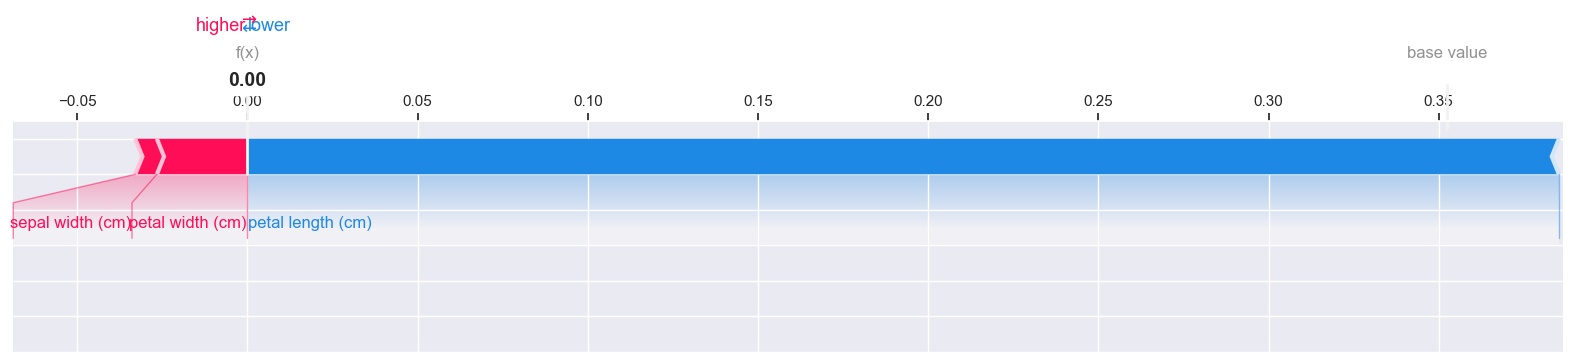

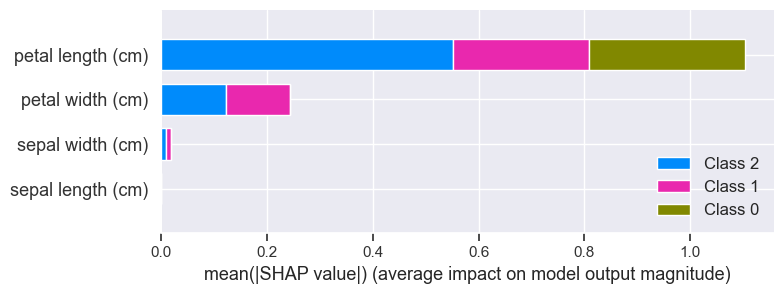

In [88]:
import pandas as pd
import shap
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
from sklearn.metrics import roc_auc_score
import numpy as np

# Initialize JS visualization code
shap.initjs()

# Load the Iris dataset
iris = pd.read_csv("iris_data.csv")
X = iris.iloc[:, 0:-1]  # Data

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(iris.iloc[:, 4])  # Target

# Split and standardize the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a list of tree-based classifiers
classifier_list = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    ExtraTreesClassifier(n_estimators=100, random_state=42),
    DecisionTreeClassifier(random_state=42),
   
]

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Loop over each tree-based classifier
for clf in classifier_list:
    print(f"Evaluating {clf.__class__.__name__}")
    
    # Initialize lists for storing AUC scores
    cv_auc_scores = []
    test_auc_scores = []
    
    for train_index, valid_index in skf.split(X_train, y_train):
        X_train_cv, X_valid_cv = X_train[train_index], X_train[valid_index]
        y_train_cv, y_valid_cv = y_train[train_index], y_train[valid_index]
        
        # Train the classifier
        clf.fit(X_train_cv, y_train_cv)
        
        # Predict probabilities for the validation set
        y_prob = clf.predict_proba(X_valid_cv)
        
        # Calculate AUC for the validation set
        auc_score = roc_auc_score(y_valid_cv, y_prob, multi_class='ovr')
        cv_auc_scores.append(auc_score)
    
    # Calculate the mean AUC score for cross-validation
    mean_cv_auc = np.mean(cv_auc_scores)
    
    # Predict probabilities for the test set
    y_prob_test = clf.predict_proba(X_test)
    
    # Calculate AUC for the test set
    test_auc_score = roc_auc_score(y_test, y_prob_test, multi_class='ovr')
    
    print(f"Mean CV AUC Score: {mean_cv_auc:.4f}")
    print(f"Test AUC Score: {test_auc_score:.4f}")
    
    # Train the classifier on the entire training set for SHAP explanation
    clf.fit(X_train, y_train)
    
    # Explain the model's predictions using SHAP
    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(X)

    # Create a force plot
    # Replace 'instance_index' with the index of the instance you want to explain
    instance_index = 1
    shap.force_plot(
        explainer.expected_value[1], # The expected value of the model output
        shap_values[1][instance_index,:], # The SHAP values for the instance
        feature_names=iris.columns[:-1], # The feature names
        matplotlib=True
    )

    
    # Plot the SHAP values
    shap.summary_plot(shap_values, X, feature_names=iris.columns[:-1], plot_type="bar")
    
  

# KernelExplainer

In [2]:
import pandas as pd
import shap
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score
import numpy as np

# Initialize JS visualization code
shap.initjs()

# Load the Iris dataset
iris = pd.read_csv("iris_data.csv")
X = iris.iloc[:, 0:-1]  # Data

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(iris.iloc[:, 4])  # Target

# Split and standardize the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

# Create a list with the SVM classifier
classifier_list = [
    SVC(kernel='rbf', probability=True, random_state=42),
]

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Loop over the SVM classifier
for clf in classifier_list:
    print(f"Evaluating {clf.__class__.__name__}")
    
    # Initialize lists for storing AUC scores
    cv_auc_scores = []
    test_auc_scores = []
    
    for train_index, valid_index in skf.split(X_train, y_train):
        X_train_cv, X_valid_cv = X_train.iloc[train_index], X_train.iloc[valid_index]
        y_train_cv, y_valid_cv = y_train[train_index], y_train[valid_index]
        
        # Train the classifier
        clf.fit(X_train_cv, y_train_cv)
        
        # Predict probabilities for the validation set
        y_prob = clf.predict_proba(X_valid_cv)
        
        # Calculate AUC for the validation set
        auc_score = roc_auc_score(y_valid_cv, y_prob, multi_class='ovr')
        cv_auc_scores.append(auc_score)
    
    # Calculate the mean AUC score for cross-validation
    mean_cv_auc = np.mean(cv_auc_scores)
    
    # Predict probabilities for the test set
    y_prob_test = clf.predict_proba(X_test)
    
    # Calculate AUC for the test set
    test_auc_score = roc_auc_score(y_test, y_prob_test, multi_class='ovr')
    
    print(f"Mean CV AUC Score: {mean_cv_auc:.4f}")
    print(f"Test AUC Score: {test_auc_score:.4f}")
    
    # Train the classifier on the entire training set for SHAP explanation
    clf.fit(X_train, y_train)
    
    # Use Kernel SHAP to explain test set predictions
    explainer = shap.KernelExplainer(clf.predict_proba, X_train, link="logit")
    shap_values = explainer.shap_values(X_test, nsamples=100)

    # plot the SHAP values for the Setosa output of the first instance
    shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")

Using 105 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Evaluating SVC
Mean CV AUC Score: 0.9974
Test AUC Score: 1.0000


  0%|          | 0/45 [00:00<?, ?it/s]

In [3]:
# plot the SHAP values for the Setosa output of all instances
shap.force_plot(explainer.expected_value[0], shap_values[0], X, link="logit")

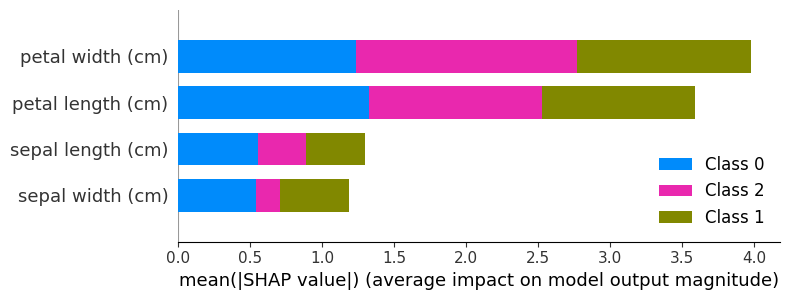

In [4]:
# Plot the SHAP values
shap.summary_plot(shap_values, X,  plot_type="bar")

# Binary Data

In [1]:
# Importing Required Libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, cohen_kappa_score

# Data Preparation
df_train = pd.read_csv("../train_data.csv")
df_validation = pd.read_csv("../test_data.csv")

# Feature Isolation
X_single_feature = df_train.iloc[:, 1:-9170]
y_train = df_train.iloc[:, -1]
X_single_feature_validation = df_validation.iloc[:, 1:-9170]
y_validation = df_validation.iloc[:, -1]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [7]:
x_train

NameError: name 'x_train' is not defined

In [2]:
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report

df_train = pd.read_csv("../train_data.csv")
df_test = pd.read_csv("../test_data.csv")

x_train = df_train.iloc[:,1:-1] # X will contain all the columns except the first and last one, which has ID and label
y_train = df_train.iloc[:,-1]

x_test = df_test.iloc[:,1:-1] # X will contain all the columns except the first and last one, which has ID and label
y_test = df_test.iloc[:,-1]

x_train=x_train.iloc [:,0:20]
x_test=x_test.iloc [:,0:20]

x_train.reset_index(inplace=True, drop=True)
y_train = y_train.reset_index(drop=True)

x_test.reset_index(inplace=True, drop=True)
y_test = y_test.reset_index(drop=True)

x_test = pd.DataFrame(x_test)
x_train = pd.DataFrame(x_train)

import pandas as pd
import numpy as np
import scipy
import os
import sys
import math
import getopt
import collections
import tqdm
import itertools
import argparse
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import random
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize, word_tokenize
from scipy import stats
import seaborn as sns; sns.set()
import warnings
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.utils import shuffle
warnings.filterwarnings(action = 'ignore') 
import gensim 
from gensim.models import Word2Vec
import sys
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
import xgboost
from sklearn.tree import DecisionTreeClassifier




def calc_metrics(cf_matrix):
  tn = cf_matrix[0]
  fp = cf_matrix[1]
  fn = cf_matrix[2]
  tp = cf_matrix[3]
  if (((tp+fn)==0)|((tn+fp)==0)|((tp+fp)==0)|((tn+fp)==0)|((tn+fn)==0)):
    sens = tp/(tp+fn)
    spec = tn/(tn+fp)
    prec = 0
    acc = (tp+tn)/(tp+tn+fn+fp)
    mcc = 0
    f1 = tp/(tp+(0.5*(fp+fn)))
    return tp,fp,fn,tn,sens,spec,prec,acc,mcc,f1
  else: 
    sens = tp/(tp+fn)
    spec = tn/(tn+fp)
    prec = tp/(tp+fp)
    acc = (tp+tn)/(tp+tn+fn+fp)
    mcc = ((tp*tn)-(fp*fn))/(((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**0.5)
    f1 = tp/(tp+(0.5*(fp+fn)))
    return tp,fp,fn,tn,sens,spec,prec,acc,mcc,f1


#svm.SVC(kernel='linear',random_state=1, probability=True), 
import xgboost
classifier_list = [ExtraTreesClassifier(n_jobs= -1, criterion = 'entropy',
                       n_estimators=200, random_state= 42)]


final_metrics = []
for i in classifier_list:
#data_rand
    print(i)
    from  sklearn.model_selection import StratifiedKFold, KFold
    import numpy as np
    from sklearn import svm
    from sklearn.metrics import roc_auc_score
    skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    #kf.get_n_splits(X)
    cc = []
    dd = []
    ee = [] 
    clf = i
    auc_scores=[]
    for train, test in skf.split(x_train, y_train):
        train_p = x_train.iloc[train,:]
        test_p = x_train.iloc[test]
        train_y = y_train[train]
        test_y = y_train[test]
        clf.fit(train_p, train_y)

        predict_y = clf.predict_proba(test_p)[:,1]
        cc.append(clf.predict(test_p))
        ee.append(clf.predict_proba(test_p)[:,1])
        dd.append(test_y)
        auc_scores.append(roc_auc_score(test_y, predict_y))
    np.array(auc_scores).mean()
    #Training_metrics
    metrics = []
    for i in range(5):
        metrics.append(calc_metrics(confusion_matrix(dd[i], cc[i]).ravel()))
    train_matrics=pd.DataFrame(metrics, columns=['tp','fp','fn','tn','sens','spec','prec','acc','mcc','f1'])
    asdf = list(train_matrics.mean())
    asdf.append(np.array(auc_scores).mean())
    final_metrics.append(asdf)
    
    #testing metrics
    predict_y = clf.predict_proba(x_test)[:,1]
    predict_label_y = clf.predict(x_test)
    test_auc = roc_auc_score(y_test, predict_y)
    conf_mat_test = confusion_matrix(y_test,predict_label_y).ravel()
    
    test_metrics = list(calc_metrics(conf_mat_test))
    test_metrics.append(test_auc)
    final_metrics.append(test_metrics)
    
pd.DataFrame( final_metrics, columns=['TP','FN','FN','TN','SENS','SPEC','PREC', 'ACC','MCC', 'F1', 'AUC'])


ExtraTreesClassifier(criterion='entropy', n_estimators=200, n_jobs=-1,
                     random_state=42)


TP    FN     FN      TN      SENS      SPEC      PREC       ACC  \
0  730.6  83.2  152.2   799.6  0.827594  0.905750  0.897964  0.866675   
1  944.0  94.0  160.0  1010.0  0.855072  0.914855  0.909441  0.884964   

        MCC        F1       AUC  
0  0.735753  0.861242  0.935923  
1  0.771307  0.881419  0.945607

In [9]:
x_train

AAC_A  AAC_C  AAC_D  AAC_E  AAC_F  AAC_G  AAC_H  AAC_I  AAC_K  AAC_L  \
0      8.33   0.00   8.33   8.33   0.00  25.00   0.00   0.00   0.00   8.33   
1      9.38   0.00   0.00   6.25   9.38  12.50   0.00  15.62   3.12  18.75   
2      0.00  35.29   0.00   0.00   5.88   5.88   0.00   0.00   5.88   5.88   
3      7.14  28.57   0.00   7.14   0.00  14.29   7.14   0.00   0.00   0.00   
4      3.45   0.00  10.34   0.00   6.90   3.45   3.45   0.00   3.45   6.90   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
8823   0.00   0.00   5.26  10.53   0.00   0.00   0.00   0.00   5.26  26.32   
8824   5.56   0.00   0.00   0.00   5.56   5.56   0.00   0.00  16.67   5.56   
8825   0.00   0.00   0.00   0.00   7.69   0.00   0.00  15.38  23.08   7.69   
8826  10.53   0.00   5.26  15.79   0.00   0.00   0.00   5.26  10.53  15.79   
8827  16.67   0.00   0.00   0.00   8.33   8.33   0.00   0.00   0.00  25.00   

      AAC_M  AAC_N  AAC_P  AAC_Q  AAC_R  AAC_S  AAC_T  AAC_V  AAC_W  AAC_Y  
0      0.00   0.00   0.00  16.67   8.33   8.33   0.00   8.33   0.00   0.00  
1      3.12   3.12   0.00   3.12   0.00   9.38   6.25   0.00   0.00   0.00  
2      5.88   0.00  11.76   0.00   0.00   5.88  17.65   0.00   0.00   0.00  
3      0.00   7.14   7.14   0.00   7.14   7.14   7.14   0.00   0.00   0.00  
4      3.45   0.00   0.00  10.34   6.90  13.79  13.79   3.45   3.45   6.90  
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
8823   5.26   5.26   0.00  10.53   0.00   5.26   5.26  10.53   0.00  10.53  
8824   5.56  16.67   5.56   0.00   5.56  11.11   0.00  11.11   0.00   5.56  
8825   7.69   0.00   0.00   0.00  23.08   7.69   7.69   0.00   0.00   0.00  
8826   5.26   5.26   0.00  15.79   5.26   0.00   5.26   0.00   0.00   0.00  
8827   0.00   0.00   8.33   0.00   8.33   8.33   0.00  16.67   0.00   0.00  

[8828 rows x 20 columns]

In [3]:

explainer = shap.TreeExplainer(clf, feature_perturbation='interventional')
shap_values = explainer.shap_values(x_train, check_additivity=False)


# summary_plot

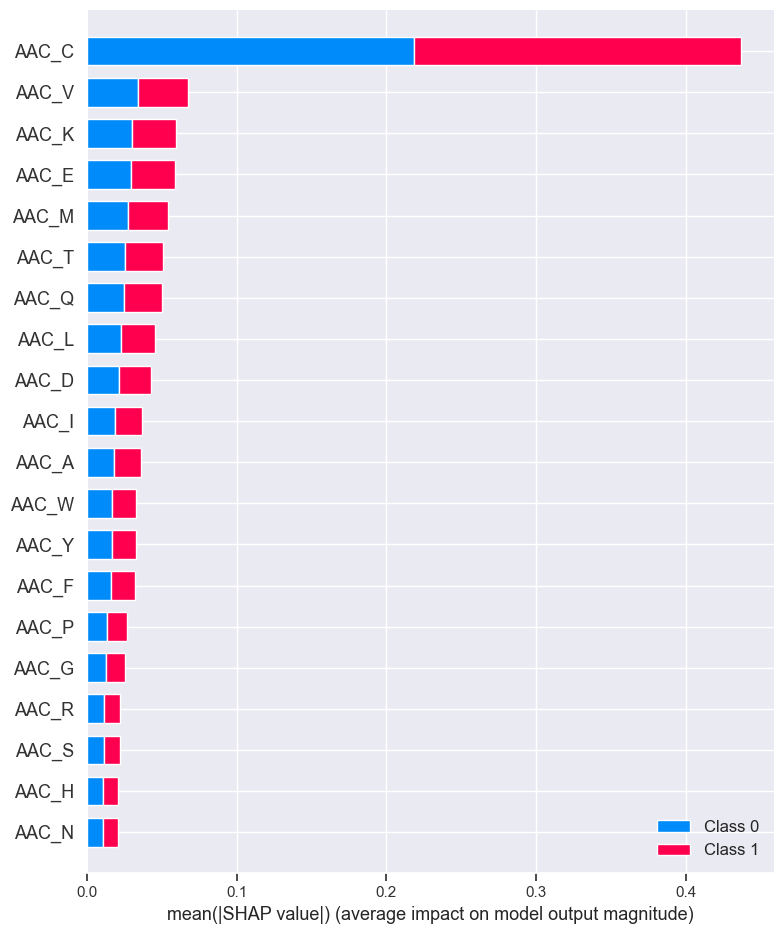

<Figure size 640x480 with 0 Axes>

In [4]:
# Summary plot
shap.summary_plot(shap_values, x_test, feature_names=x_test.columns)
# Save the figure with a DPI of 600
plt.savefig("shap_summary_plot1.jpg", dpi=600, bbox_inches='tight')

# Show the plot (optional)
plt.show()

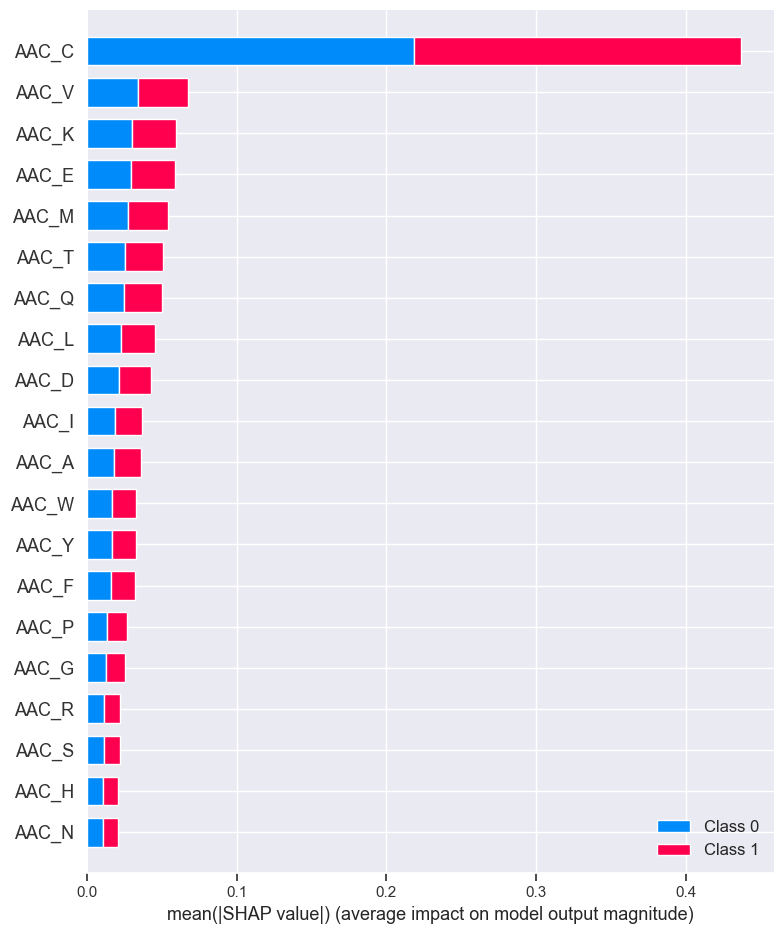

In [5]:
#shap.summary_plot(shap_values[0], x_test)
shap.summary_plot(shap_values, x_test)

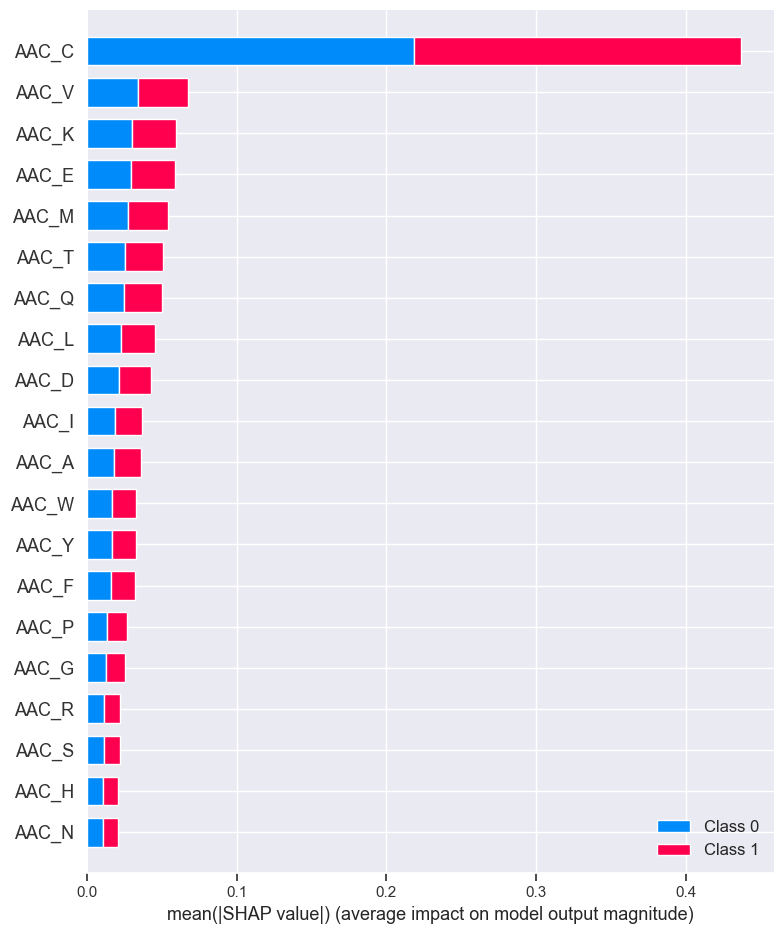

In [15]:
shap.summary_plot(shap_values,  x_train, plot_type='bar')

In [17]:
df = pd.DataFrame(shap_values[0])
df.to_csv("shap_value_0.csv")

In [18]:
df.to_csv("shap_value_0.csv")

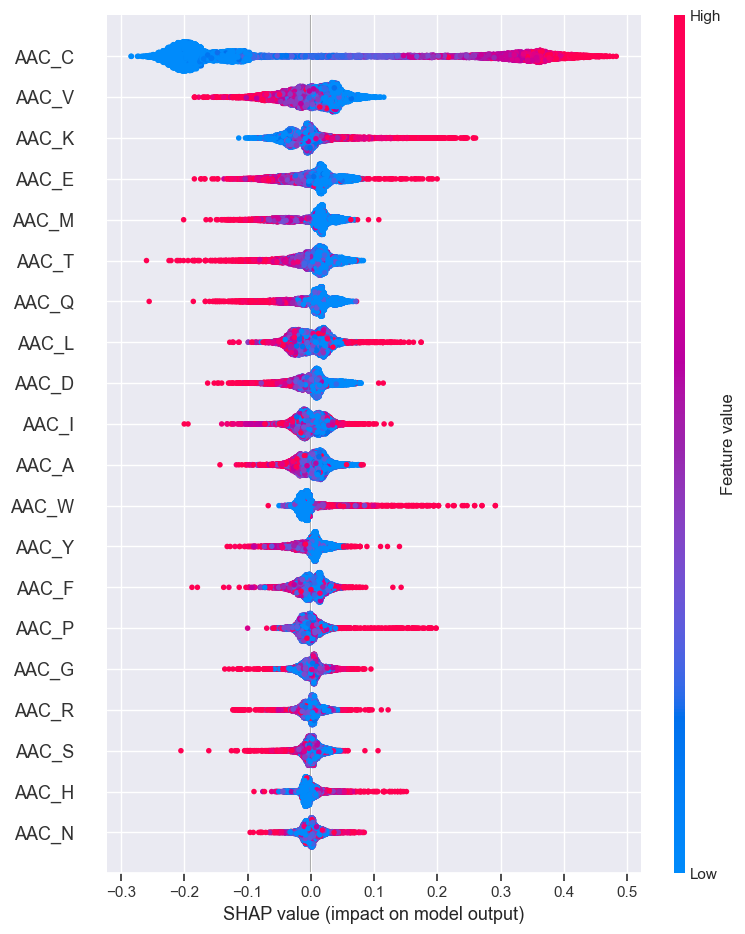

In [6]:

shap.summary_plot(shap_values[1], x_train, plot_type='dot')

# plot_type = "dot", "violin",  "bar", "layered_violin"

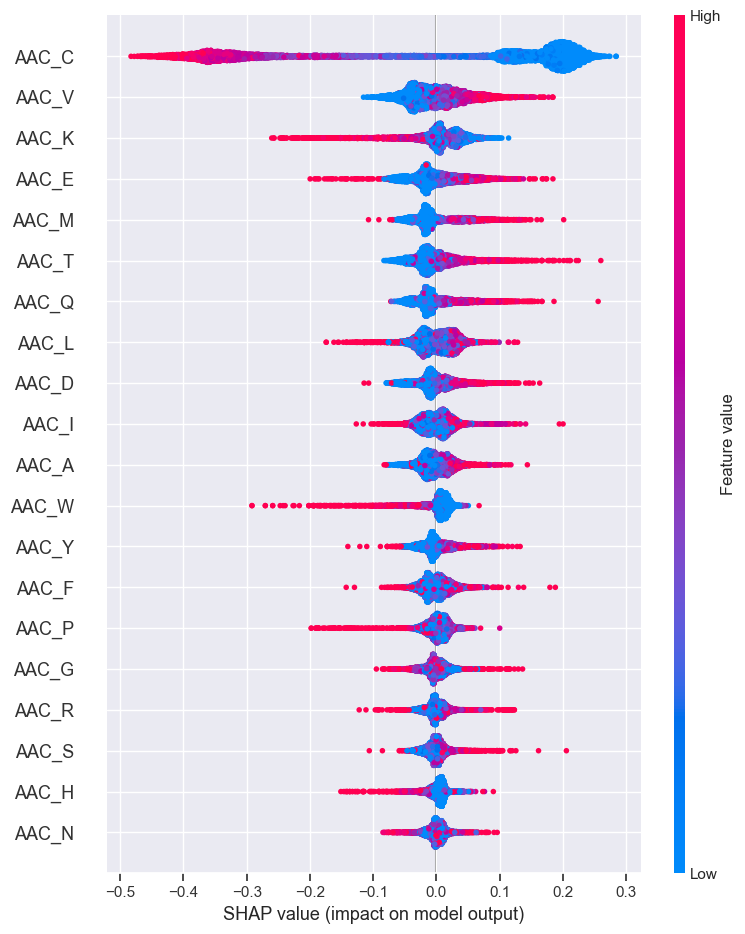

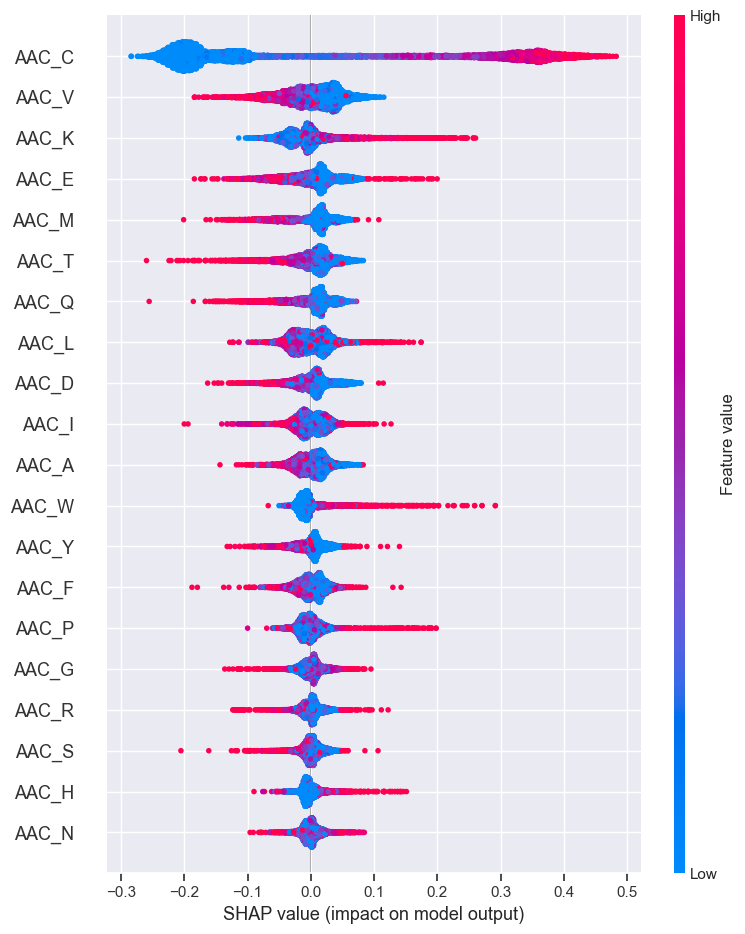

In [7]:
shap.summary_plot(shap_values[0], x_train)
shap.summary_plot(shap_values[1], x_train)

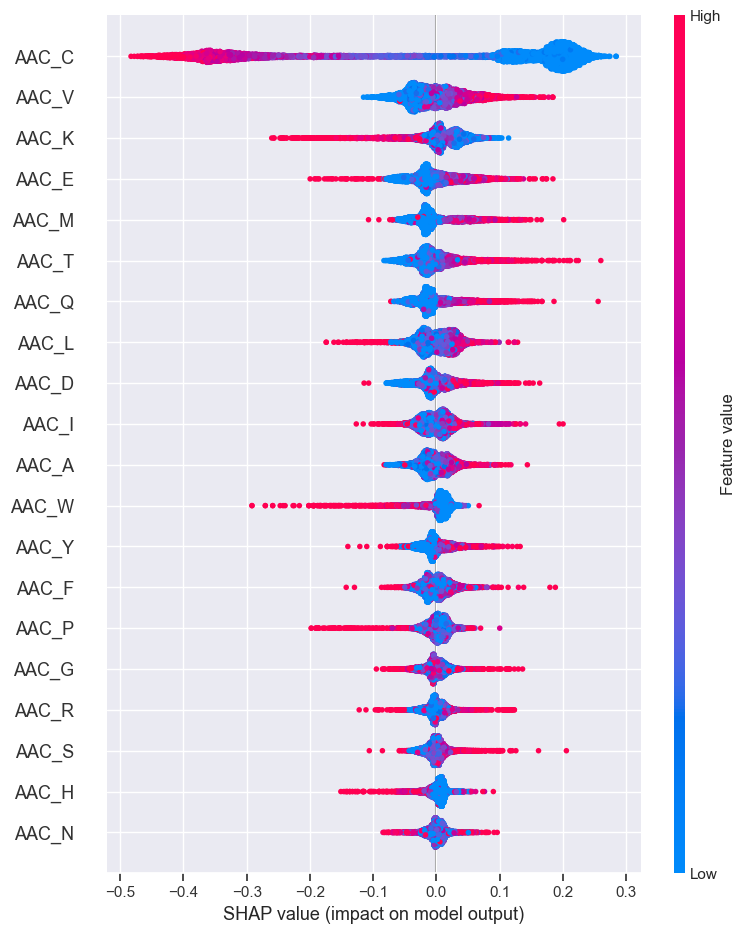

In [8]:
# Convert the relevant SHAP values to a numpy array for easier manipulation
shap_array = np.array(shap_values[0])

# Calculate the mean absolute SHAP value for each feature
mean_abs_shap_values = np.abs(shap_array).mean(axis=0)

# Get the indices of the features sorted by the mean absolute SHAP value
sorted_feature_indices = np.argsort(mean_abs_shap_values)[::-1]

# Define the number of top features you want to display
num_top_features = 20  # for example

# Subset the shap_values and x_test for the top features
top_shap_values = shap_array[:, sorted_feature_indices[:num_top_features]]
top_x_train = x_train.iloc[:, sorted_feature_indices[:num_top_features]]

# Create the SHAP summary plot
shap.summary_plot(top_shap_values, top_x_train, feature_names=top_x_train.columns)

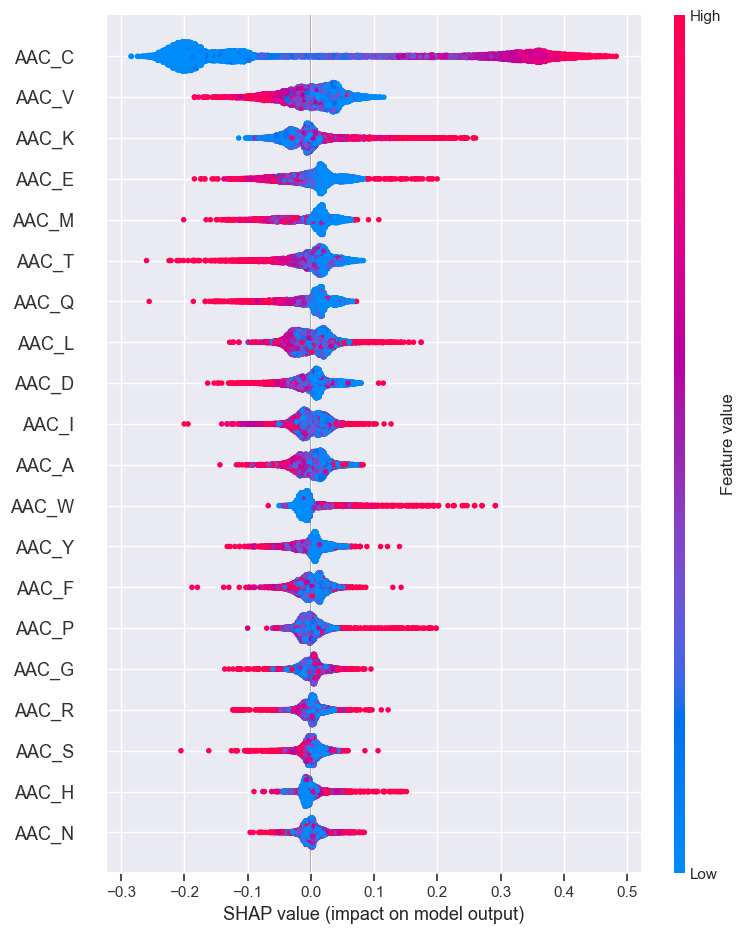

In [19]:
# Convert the relevant SHAP values to a numpy array for easier manipulation
shap_array = np.array(shap_values[1])

# Calculate the mean absolute SHAP value for each feature
mean_abs_shap_values = np.abs(shap_array).mean(axis=0)

# Get the indices of the features sorted by the mean absolute SHAP value
sorted_feature_indices = np.argsort(mean_abs_shap_values)[::-1]

# Define the number of top features you want to display
num_top_features = 20  # for example

# Subset the shap_values and x_test for the top features
top_shap_values = shap_array[:, sorted_feature_indices[:num_top_features]]
top_x_train = x_train.iloc[:, sorted_feature_indices[:num_top_features]]

# Create the SHAP summary plot
shap.summary_plot(top_shap_values, top_x_train, feature_names=top_x_train.columns)

In [21]:
# Create a DataFrame from the SHAP values
shap_df = pd.DataFrame(shap_values[0], columns=x_train.columns)

# Display the DataFrame
print(shap_df)

         AAC_A     AAC_C     AAC_D     AAC_E     AAC_F     AAC_G     AAC_H  \
0     0.017384  0.218924  0.023229  0.037137 -0.005136  0.004630  0.009530   
1     0.017013  0.181406 -0.003553  0.035710  0.018852  0.000389  0.012017   
2    -0.012589 -0.423838 -0.009617 -0.014066  0.019850 -0.004552  0.004384   
3     0.000022 -0.371452 -0.009302  0.014452 -0.012558 -0.002794 -0.011569   
4    -0.004080  0.226815  0.016408 -0.005583  0.025099  0.008550  0.005878   
...        ...       ...       ...       ...       ...       ...       ...   
8823 -0.043034  0.152844 -0.018642 -0.005782 -0.025725 -0.019187 -0.003625   
8824 -0.001453  0.180653 -0.017282 -0.023876  0.001050 -0.005085  0.004243   
8825 -0.045494  0.102428 -0.050109 -0.057334 -0.027444  0.009901 -0.007913   
8826  0.013690  0.183823  0.017351  0.072715  0.003655  0.016822  0.004820   
8827 -0.014941  0.121084 -0.060559 -0.067256 -0.033789 -0.034274 -0.007638   

         AAC_I     AAC_K     AAC_L     AAC_M     AAC_N     AAC_

# force_plot
### toxic instance

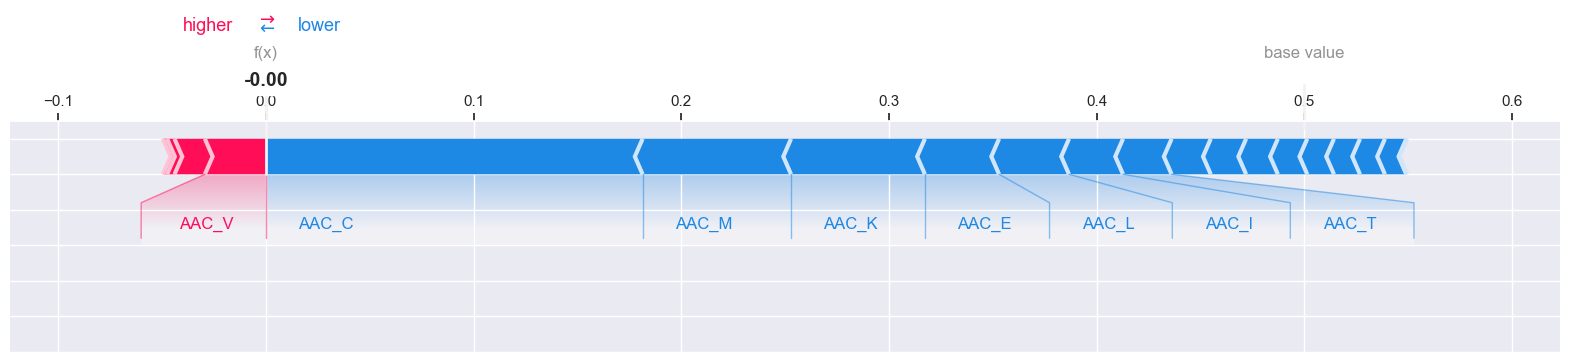

In [22]:
# Initialize JS visualization code
shap.initjs()

# Create a force plot
# Replace 'instance_index' with the index of the instance you want to explain
instance_index = 1
shap.force_plot(
    explainer.expected_value[1], # The expected value of the model output
    shap_values[1][instance_index,:], # The SHAP values for the instance
    feature_names=x_test.columns, # The feature names
    matplotlib=True
)

### non-toxic instance

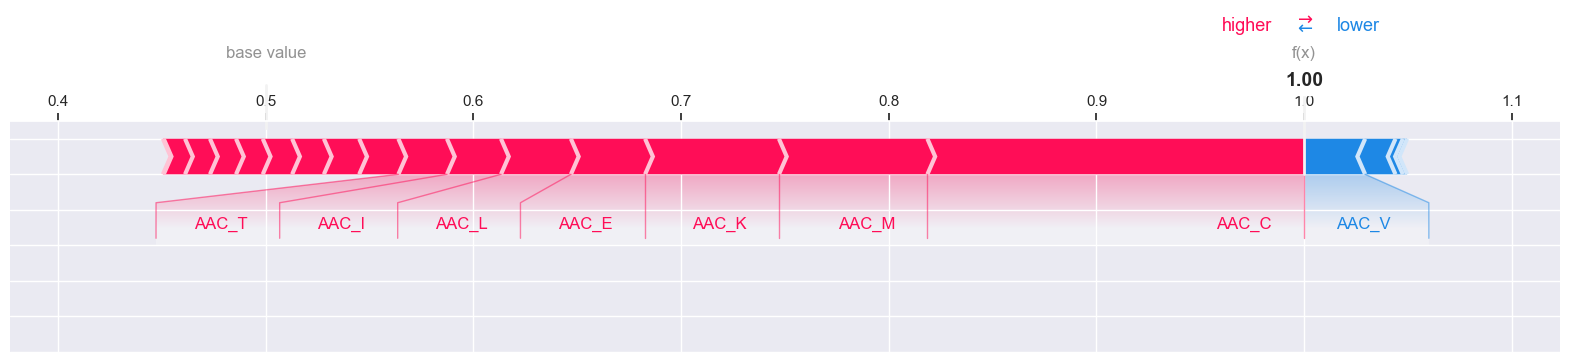

In [23]:
# Initialize JS visualization code
shap.initjs()

# Create a force plot
# Replace 'instance_index' with the index of the instance you want to explain
instance_index = 1
shap.force_plot(
    explainer.expected_value[0], # The expected value of the model output
    shap_values[0][instance_index,:], # The SHAP values for the instance
    feature_names=x_test.columns, # The feature names
    matplotlib=True
)

# decision_plot

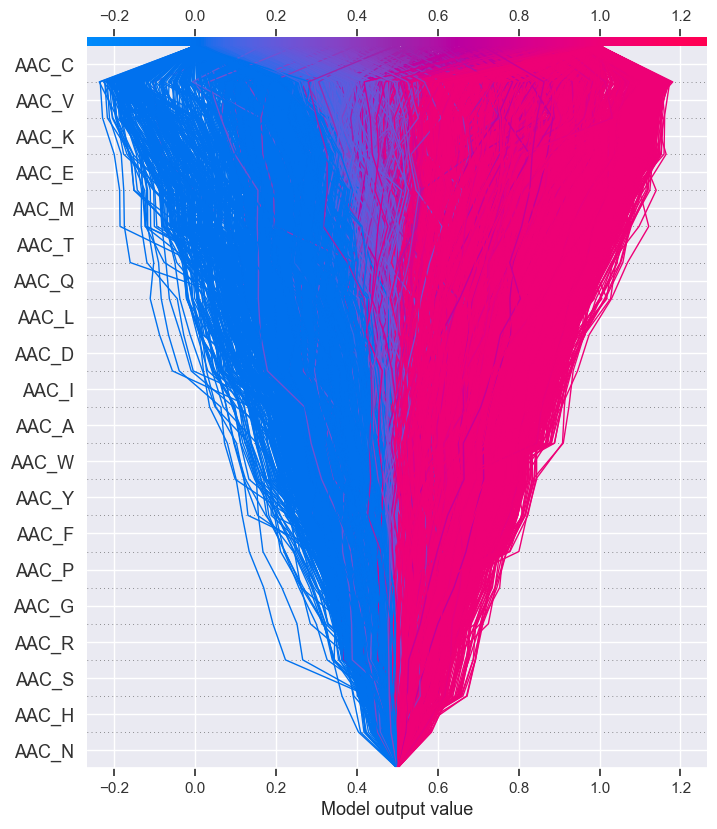

In [24]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], x_test.columns, ignore_warnings=True)


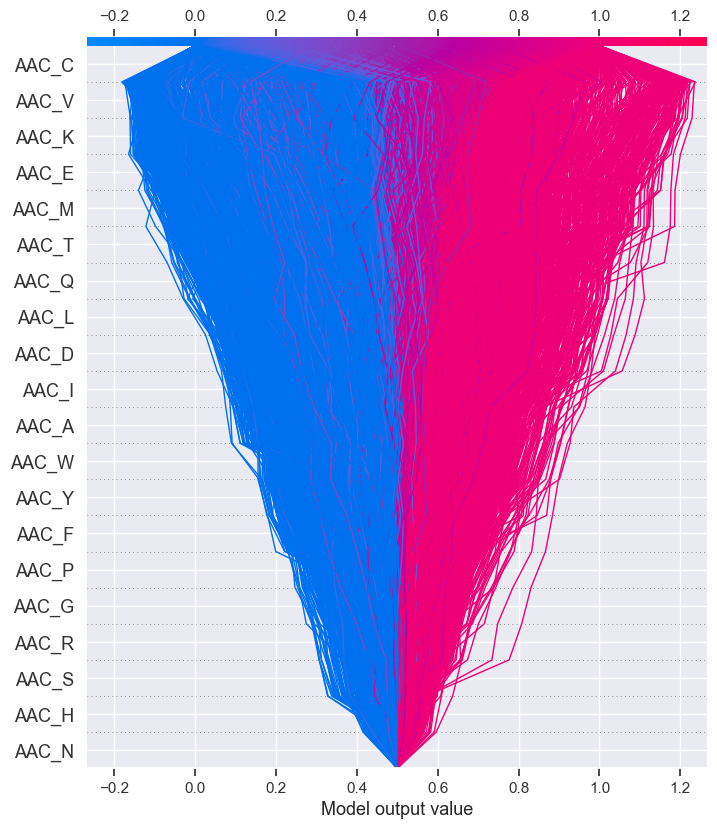

In [42]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], x_test.columns, ignore_warnings=True)

### considering top features only

In [25]:
import numpy as np
import shap

# Assuming shap_values[1] is the SHAP values array for the positive class (for binary classification)
# and x_test.columns are the feature names

# Step 1: Calculate the mean absolute SHAP values for each feature
mean_abs_shap = np.abs(shap_values[1]).mean(axis=0)

# Step 2: Identify the indices of the top 10 features
top_10_indices = np.argsort(mean_abs_shap)[-10:]

# Step 3: Filter the SHAP values for the top 10 features
filtered_shap_values = shap_values[1][:, top_10_indices]

# Step 4: Adjust the feature names list
top_10_feature_names = x_test.columns[top_10_indices]

# Step 5: Plot the decision plot
shap.decision_plot(explainer.expected_value[1], filtered_shap_values, 
                   feature_names=top_10_feature_names, ignore_warnings=True)


TypeError: The feature_names arg requires a list or numpy array.

In [26]:
# Step 4: Adjust the feature names list and ensure it's a list
top_10_feature_names = list(x_test.columns[top_10_indices])


In [27]:
top_10_feature_names

['AAC_I',
 'AAC_D',
 'AAC_L',
 'AAC_Q',
 'AAC_T',
 'AAC_M',
 'AAC_E',
 'AAC_K',
 'AAC_V',
 'AAC_C']

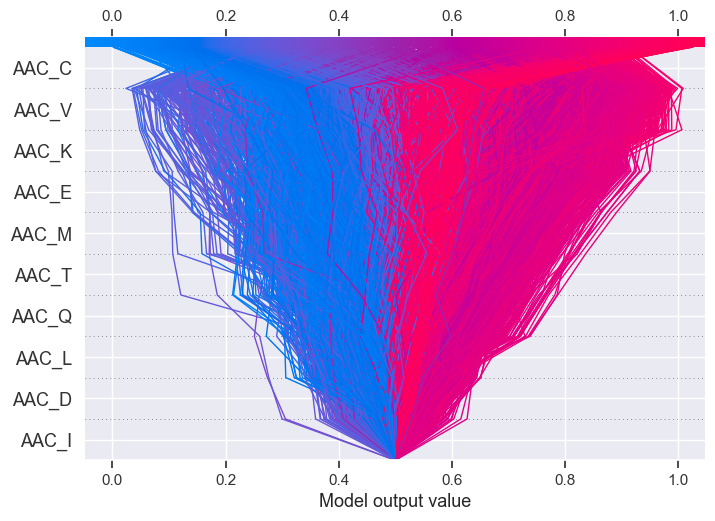

In [28]:
import numpy as np
import shap

# Assuming shap_values[1] is the SHAP values array for the positive class (for binary classification)
# and x_test.columns are the feature names

# Step 1: Calculate the mean absolute SHAP values for each feature
mean_abs_shap = np.abs(shap_values[1]).mean(axis=0)

# Step 2: Identify the indices of the top 10 features
top_10_indices = np.argsort(mean_abs_shap)[-10:]

# Step 3: Filter the SHAP values for the top 10 features
filtered_shap_values = shap_values[1][:, top_10_indices]

# Step 4: Adjust the feature names list and ensure it's a list
top_10_feature_names = list(x_test.columns[top_10_indices])

# Step 5: Plot the decision plot
shap.decision_plot(explainer.expected_value[1], filtered_shap_values, 
                   feature_names=top_10_feature_names, ignore_warnings=True)


### considering top 1000 samples only

In [29]:
import numpy as np
import shap

# Assuming shap_values[1] is the SHAP values array for the positive class (for binary classification)

# Step 1: Calculate the mean absolute SHAP values for each instance
mean_abs_shap_per_instance = np.abs(shap_values[1]).mean(axis=1)

# Step 2: Identify the indices of the top instances
top_indices = np.argsort(mean_abs_shap_per_instance)[-10:]

# Step 3: Filter the SHAP values for the top instances
filtered_shap_values = shap_values[1][top_indices, :]

# Step 4: Plot the decision plot
shap.decision_plot(explainer.expected_value[1], filtered_shap_values, 
                   feature_names=x_test.columns, ignore_warnings=True)


TypeError: The feature_names arg requires a list or numpy array.

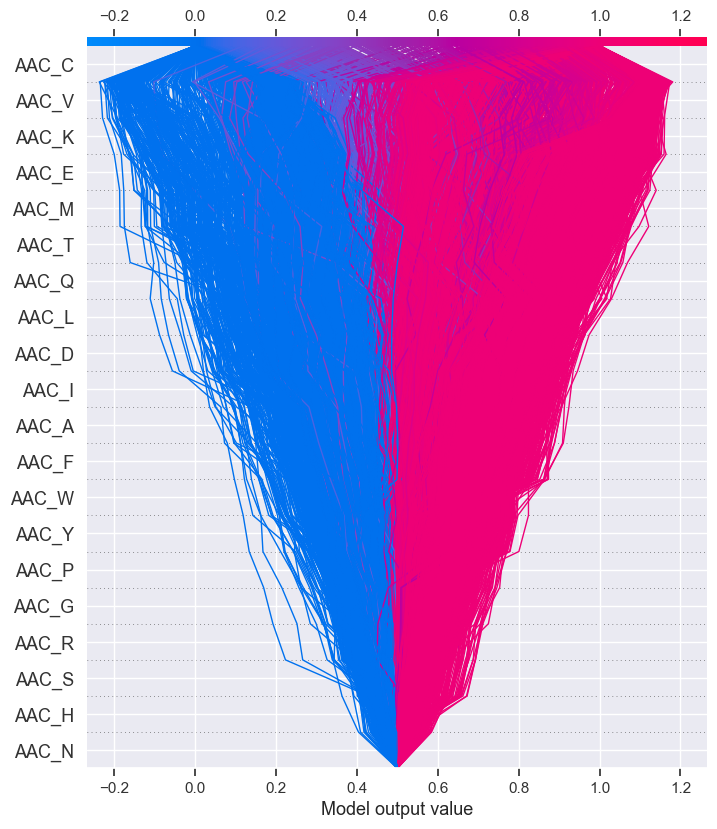

In [44]:
import numpy as np
import shap

# Assuming shap_values[1] is the SHAP values array for the positive class (for binary classification)

# Step 1: Calculate the mean absolute SHAP values for each instance
mean_abs_shap_per_instance = np.abs(shap_values[1]).mean(axis=1)

# Step 2: Identify the indices of the top instances
top_indices = np.argsort(mean_abs_shap_per_instance)[-8000:]

# Step 3: Filter the SHAP values for the top instances
filtered_shap_values = shap_values[1][top_indices, :]

# Convert feature names to a list
feature_names_list = list(x_test.columns)

# Step 4: Plot the decision plot
shap.decision_plot(explainer.expected_value[1], filtered_shap_values, 
                   feature_names=feature_names_list, ignore_warnings=True)


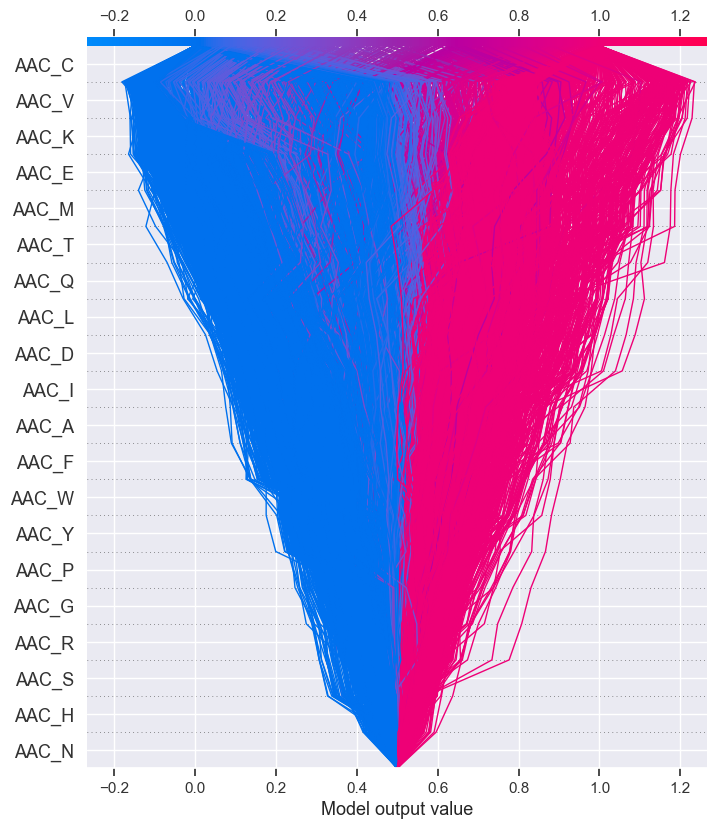

In [43]:
import numpy as np
import shap

# Assuming shap_values[1] is the SHAP values array for the positive class (for binary classification)

# Step 1: Calculate the mean absolute SHAP values for each instance
mean_abs_shap_per_instance = np.abs(shap_values[0]).mean(axis=1)

# Step 2: Identify the indices of the top instances
top_indices = np.argsort(mean_abs_shap_per_instance)[-8000:]

# Step 3: Filter the SHAP values for the top instances
filtered_shap_values = shap_values[0][top_indices, :]

# Convert feature names to a list
feature_names_list = list(x_test.columns)

# Step 4: Plot the decision plot
shap.decision_plot(explainer.expected_value[0], filtered_shap_values, 
                   feature_names=feature_names_list, ignore_warnings=True)

# dependence_plot

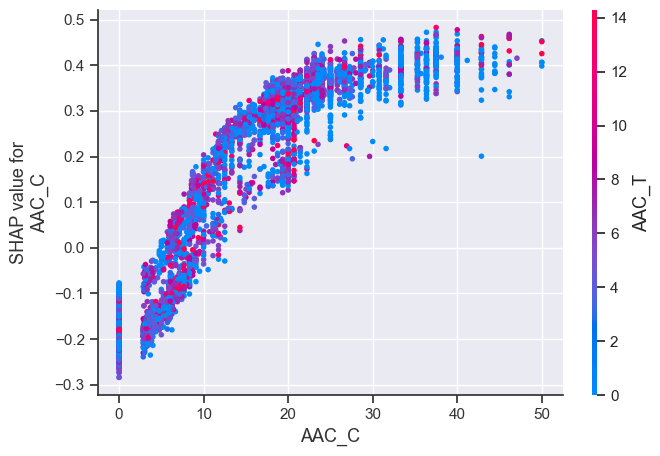

In [50]:
shap.dependence_plot("AAC_C", shap_values[1], x_train,interaction_index="AAC_T")

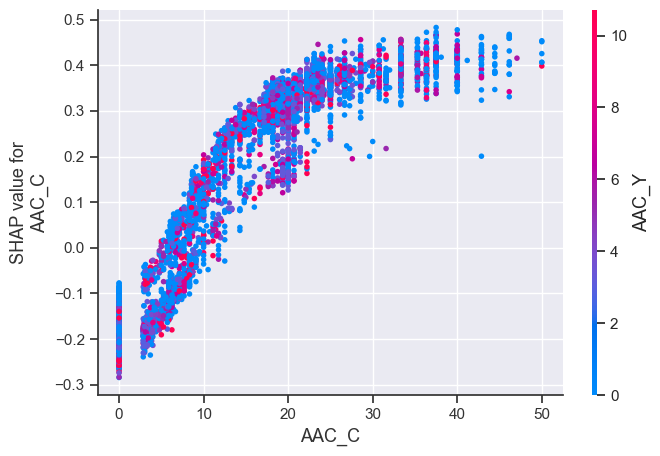

In [73]:
shap.dependence_plot("AAC_C", shap_values[1], x_train,interaction_index="AAC_Y")

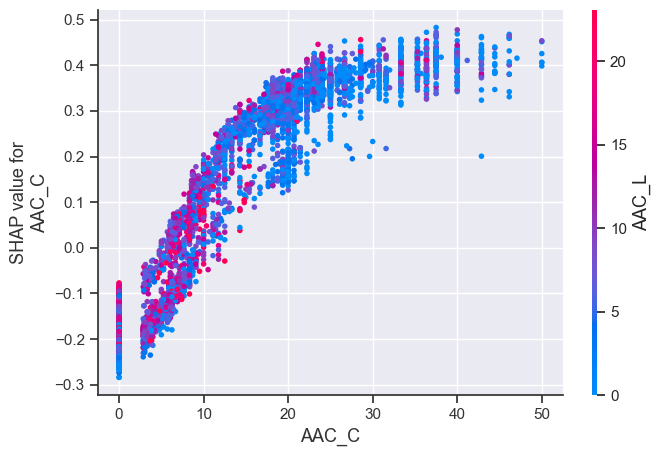

In [61]:
shap.dependence_plot("AAC_C", shap_values[1], x_train,interaction_index="AAC_L")

In [19]:
### correlation 

In [21]:
df = pd.read_csv('../../Book1.csv')

In [22]:
df

FEATURE    Shap_0    Shap_1       ET
0    AAC_A  0.005824  0.005379  0.04055
1    AAC_C  0.243634  0.150456  0.25505
2    AAC_D  0.005267  0.005217  0.03830
3    AAC_E  0.005894  0.008191  0.04316
4    AAC_F  0.004768  0.005652  0.04087
5    AAC_G  0.004260  0.002412  0.03958
6    AAC_H  0.001783  0.003047  0.02726
7    AAC_I  0.005784  0.006095  0.04336
8    AAC_K  0.004628  0.012205  0.05625
9    AAC_L  0.006211  0.007987  0.05085
10   AAC_M  0.005277  0.009080  0.03413
11   AAC_N  0.002446  0.002628  0.03427
12   AAC_P  0.003700  0.005184  0.03953
13   AAC_Q  0.006228  0.006859  0.03507
14   AAC_R  0.003173  0.002804  0.03651
15   AAC_S  0.002703  0.002788  0.03710
16   AAC_T  0.007666  0.006495  0.04012
17   AAC_V  0.008304  0.006226  0.04747
18   AAC_W  0.005825  0.005070  0.02781
19   AAC_Y  0.003747  0.004800  0.03277

In [27]:
df = pd.read_csv('../../Book1.csv')
# Calculate the Pearson correlation matrix between columns
correlation = df['Shap_0'].corr(df['ET'], method='pearson')

# Print the correlation matrix
print("Pearson Correlation Matrix:")
print(correlation_matrix)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Pearson Correlation Matrix:
          Shap_0    Shap_1        ET
Shap_0  1.000000  0.997908  0.991167
Shap_1  0.997908  1.000000  0.993679
ET      0.991167  0.993679  1.000000


In [28]:

# Calculate the Pearson correlation between "Shap_0" and "Shap_1" columns
correlation = df['Shap_0'].corr(df['Shap_1'], method='pearson')

# Print the correlation coefficient
print(f"Pearson Correlation between Shap_0 and Shap_1: {correlation}")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Pearson Correlation between Shap_0 and Shap_1: 0.9979078945535451


In [29]:
### shap for complete data

In [1]:
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report

df_train = pd.read_csv("../train_data.csv")
df_test = pd.read_csv("../test_data.csv")

x_train = df_train.iloc[:,1:-1] # X will contain all the columns except the first and last one, which has ID and label
y_train = df_train.iloc[:,-1]

x_test = df_test.iloc[:,1:-1] # X will contain all the columns except the first and last one, which has ID and label
y_test = df_test.iloc[:,-1]

x_train=x_train.iloc [:,0:420]
x_test=x_test.iloc [:,0:420]

x_train.reset_index(inplace=True, drop=True)
y_train = y_train.reset_index(drop=True)

x_test.reset_index(inplace=True, drop=True)
y_test = y_test.reset_index(drop=True)

x_test = pd.DataFrame(x_test)
x_train = pd.DataFrame(x_train)

import pandas as pd
import numpy as np
import scipy
import os
import sys
import math
import getopt
import collections
import tqdm
import itertools
import argparse
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import random
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize, word_tokenize
from scipy import stats
import seaborn as sns; sns.set()
import warnings
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.utils import shuffle
warnings.filterwarnings(action = 'ignore') 
import gensim 
from gensim.models import Word2Vec
import sys
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
import xgboost
from sklearn.tree import DecisionTreeClassifier




def calc_metrics(cf_matrix):
  tn = cf_matrix[0]
  fp = cf_matrix[1]
  fn = cf_matrix[2]
  tp = cf_matrix[3]
  if (((tp+fn)==0)|((tn+fp)==0)|((tp+fp)==0)|((tn+fp)==0)|((tn+fn)==0)):
    sens = tp/(tp+fn)
    spec = tn/(tn+fp)
    prec = 0
    acc = (tp+tn)/(tp+tn+fn+fp)
    mcc = 0
    f1 = tp/(tp+(0.5*(fp+fn)))
    return tp,fp,fn,tn,sens,spec,prec,acc,mcc,f1
  else: 
    sens = tp/(tp+fn)
    spec = tn/(tn+fp)
    prec = tp/(tp+fp)
    acc = (tp+tn)/(tp+tn+fn+fp)
    mcc = ((tp*tn)-(fp*fn))/(((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**0.5)
    f1 = tp/(tp+(0.5*(fp+fn)))
    return tp,fp,fn,tn,sens,spec,prec,acc,mcc,f1


#svm.SVC(kernel='linear',random_state=1, probability=True), 
import xgboost
classifier_list = [ExtraTreesClassifier(n_jobs= -1, criterion = 'entropy',
                       n_estimators=200, random_state= 42)]


final_metrics = []
for i in classifier_list:
#data_rand
    print(i)
    from  sklearn.model_selection import StratifiedKFold, KFold
    import numpy as np
    from sklearn import svm
    from sklearn.metrics import roc_auc_score
    skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    #kf.get_n_splits(X)
    cc = []
    dd = []
    ee = [] 
    clf = i
    auc_scores=[]
    for train, test in skf.split(x_train, y_train):
        train_p = x_train.iloc[train,:]
        test_p = x_train.iloc[test]
        train_y = y_train[train]
        test_y = y_train[test]
        clf.fit(train_p, train_y)

        predict_y = clf.predict_proba(test_p)[:,1]
        cc.append(clf.predict(test_p))
        ee.append(clf.predict_proba(test_p)[:,1])
        dd.append(test_y)
        auc_scores.append(roc_auc_score(test_y, predict_y))
    np.array(auc_scores).mean()
    #Training_metrics
    metrics = []
    for i in range(5):
        metrics.append(calc_metrics(confusion_matrix(dd[i], cc[i]).ravel()))
    train_matrics=pd.DataFrame(metrics, columns=['tp','fp','fn','tn','sens','spec','prec','acc','mcc','f1'])
    asdf = list(train_matrics.mean())
    asdf.append(np.array(auc_scores).mean())
    final_metrics.append(asdf)
    
    #testing metrics
    predict_y = clf.predict_proba(x_test)[:,1]
    predict_label_y = clf.predict(x_test)
    test_auc = roc_auc_score(y_test, predict_y)
    conf_mat_test = confusion_matrix(y_test,predict_label_y).ravel()
    
    test_metrics = list(calc_metrics(conf_mat_test))
    test_metrics.append(test_auc)
    final_metrics.append(test_metrics)
    
pd.DataFrame( final_metrics, columns=['TP','FN','FN','TN','SENS','SPEC','PREC', 'ACC','MCC', 'F1', 'AUC'])


ExtraTreesClassifier(criterion='entropy', n_estimators=200, n_jobs=-1,
                     random_state=42)


TP    FN     FN      TN      SENS      SPEC      PREC       ACC  \
0  741.2  77.0  141.6   805.8  0.839600  0.912775  0.906070  0.876191   
1  957.0  96.0  147.0  1008.0  0.866848  0.913043  0.908832  0.889946   

        MCC        F1       AUC  
0  0.754540  0.871480  0.942558  
1  0.780725  0.887344  0.950126

In [ ]:
explainer = shap.TreeExplainer(clf, feature_perturbation='interventional')
shap_values = explainer.shap_values(x_train, check_additivity=False)

In [ ]:
df = pd.DataFrame(shap_values[0])
df.to_csv("shap_value420_0.csv")

In [ ]:
df = pd.DataFrame(shap_values[1])
df.to_csv("shap_value420_1.csv")

In [7]:
import pandas as pd
df = pd.read_csv('../../Book2.csv')
# Calculate the Pearson correlation matrix between columns
correlation = df['SHAP_0.1'].corr(df['Importance'], method='pearson')

# Print the correlation matrix
print("Pearson Correlation Matrix:")
print(correlation)

Pearson Correlation Matrix:
-0.19746805615967286


In [5]:
df

Feature        SHAP_0      SHAP_0.1  Importance
0      AAC_A -1.759555e+07  5.966204e+06    0.005751
1      AAC_C  1.968300e+13 -1.066000e+13    0.077121
2      AAC_D  2.188326e+07  4.607019e+06    0.006722
3      AAC_E -2.171000e+11 -1.449000e+09    0.009036
4      AAC_F  1.274100e+13 -1.274000e+13    0.005820
..       ...           ...           ...         ...
415  DPC1_YS -4.622000e+11 -8.430000e+10    0.001019
416  DPC1_YT -3.526000e+09  2.815655e+08    0.001377
417  DPC1_YV  5.916603e+09 -1.353000e+10    0.001277
418  DPC1_YW  7.688060e-03 -3.615900e-03    0.000199
419  DPC1_YY -8.039970e+06 -3.664000e+09    0.000907

[420 rows x 4 columns]

In [8]:
# Calculating the Pearson correlation matrix
correlation_matrix = df.corr(method='pearson')

# Printing the correlation matrix
print("Pearson Correlation Matrix:")
print(correlation_matrix)

Pearson Correlation Matrix:
              SHAP_0  SHAP_0.1  Importance
SHAP_0      1.000000 -0.836057    0.176901
SHAP_0.1   -0.836057  1.000000   -0.197468
Importance  0.176901 -0.197468    1.000000


/var/folders/px/t3y_9w795y96ggv476lfg7dh0000gn/T/ipykernel_16644/393585754.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


In [12]:
df = pd.read_csv('../../Book2.csv')
# Modify columns 1 and 2 (index 0 and 1) to be the absolute values
df.iloc[:, 1] = df.iloc[:, 1].abs()
df.iloc[:, 2] = df.iloc[:, 2].abs()

# Write the modified DataFrame back to a new CSV file
#df.to_csv('modified_file.csv', index=False)

In [13]:
# Calculating the Pearson correlation matrix
correlation_matrix = df.corr(method='pearson')

# Printing the correlation matrix
print("Pearson Correlation Matrix:")
print(correlation_matrix)

/var/folders/px/t3y_9w795y96ggv476lfg7dh0000gn/T/ipykernel_16644/393585754.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


Pearson Correlation Matrix:
              SHAP_0  SHAP_0.1  Importance
SHAP_0      1.000000  0.886204    0.191740
SHAP_0.1    0.886204  1.000000    0.197526
Importance  0.191740  0.197526    1.000000
